# Ejercicios Twitter

**Autor:** Tomás Castro <br />
**E-mail:** tcastrog10@gmail.com <br />
**GitHub:** https://github.com/tomcastro <br />

Para los siguientes ejercicios, vamos a conectar Twitter a nuestra aplicación Python para poder hacer dos tipos de análisis: sentimental y word cloud.

Primero, instalaremos todas las librerías que necesitamos para estos dos ejemplos.

In [ ]:
!pip install tweepy textblob wordcloud

## Análisis de sentimientos

Primero, importamos todas las librerías que necesitamos para esta parte. Tweepy es la librería que nos permite conectarnos a la API de Twitter, Pandas y Numpy nos permiten procesar esta información y almacenarla en un dataframe.

In [5]:
import tweepy
import pandas as pd
import numpy as np
from IPython.display import display

Agregamos las llaves de API que ya generamos para ustedes para que puedan consultar la API de Twitter.

In [2]:
# Llaves de acceso para Twitter

# Consumer:
CONSUMER_KEY    = 'vaIY3GCpoLs2KNZjU0O1OwbKe'
CONSUMER_SECRET = 'zMeF2HN5FZukSD2BrlhTiwasvAXw3uG6wssan0RXcEoeApXwoA'

# Access:
ACCESS_TOKEN  = '34757935-HGoJ1rJjoqyZbpefIoF5XbqJfNgnIUpIJhmeP4c8m'
ACCESS_SECRET = 'pgJ8OSOQ3SDZsSL41OiAy79i7qGbxmnB8yHBlNCIzNKwX'

Creamos esta función, la cual utiliza las llaves que declaramos antes para conectarnos a Twitter y poder realizar llamadas a su API.

In [3]:
# API setup:
def twitter_setup():

    # Autentificación usando las llaves:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Devuelve la API autentificada:
    api = tweepy.API(auth)
    return api

Creamos el objeto de la API con la función que declaramos, y buscamos los 200 tweets más recientes de un usuario definido.

In [15]:
# Creamos el objeto con la función que declaramos:
api = twitter_setup()

# Establecemos qué usuario queremos buscar (siéntanse libres de buscar cualquier usuario en Twitter, sin @)
user = 'realDonaldTrump'

# Populamos una lista de tweets de ese usuario
tweets = api.user_timeline(screen_name=user, count=200)

# Mostramos los últimos 5 tweets para asegurarnos que funciona
for tweet in tweets[:5]:
    print(tweet.text)
    print()

The United States will impose large sanctions on Turkey for their long time detainment of Pastor Andrew Brunson, a… https://t.co/PnHVJEY6uO

This is great - on my way, see you soon @IAGovernor Kim Reynolds! https://t.co/SXfkk12Uig

Heading to Dubuque, Iowa and then Granite City, Illinois. Looking  forward to being with many great friends!

Twitter “SHADOW BANNING” prominent Republicans. Not good. We will look into this discriminatory and illegal practic… https://t.co/Ml5infKJ0B

European Union representatives told me that they would start buying soybeans from our great farmers immediately. Al… https://t.co/Yuqt4KNeDz



Creamos un dataframe con la información traída desde la API.

In [16]:
# Creamos el dataframe con los tweets
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# Mostramos los primeros 5 tweets en nuestro dataframe
display(data.head(5))

,Tweets
0,The United States will impose large sanctions ...
1,"This is great - on my way, see you soon @IAGov..."
2,"Heading to Dubuque, Iowa and then Granite City..."
3,Twitter “SHADOW BANNING” prominent Republicans...
4,European Union representatives told me that th...


Este paso es opcional, pero agregaremos a nuestro dataframe información que podría ser relevante para un análisis posterior, tal como el largo del tweet, su id, likes y RTs.

In [17]:
# Agregamos información relevante al dataframe
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

display(data.head(5))

,Tweets,len,ID,Date,Source,Likes,RTs
0,The United States will impose large sanctions ...,139,1022502465147682817,2018-07-26 15:22:39,Twitter for iPhone,70598,20349
1,"This is great - on my way, see you soon @IAGov...",89,1022494827504644096,2018-07-26 14:52:18,Twitter for iPhone,23949,5372
2,"Heading to Dubuque, Iowa and then Granite City...",108,1022484559470977027,2018-07-26 14:11:30,Twitter for iPhone,44006,8509
3,Twitter “SHADOW BANNING” prominent Republicans...,140,1022447980408983552,2018-07-26 11:46:09,Twitter for iPhone,108812,34967
4,European Union representatives told me that th...,140,1022287249432563712,2018-07-26 01:07:28,Twitter for iPhone,77886,17568


Aquí importamos la librería TextBlob (https://textblob.readthedocs.io/en/dev/), la cual nos proporciona una red neuronal ya entrenada para detectar sentimientos en oraciones. La red está entrenada para palabras en inglés, así que utilicen un usuario que sus tweets sean en inglés.

Después, definimos dos funciones. clean_tweet va a limpiar cada tweet de caracteres especiales, tales como @ o #. analyze_sentiment clasificará un tweet por sentimiento utilizando la red ya entrenada de TextBlob.

In [8]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

Para utilizar estas funciones, es una buena idea agregar una nueva columna a nuestro dataframe original que llamaremos SA. Aquí almacenaremos el sentimiento proporcionado por TextBlob.

In [19]:
# Creamos la columna nueva SA y guardamos los valores
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# Mostramos el dataframe actualizado
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,The United States will impose large sanctions ...,139,1022502465147682817,2018-07-26 15:22:39,Twitter for iPhone,70598,20349,1
1,"This is great - on my way, see you soon @IAGov...",89,1022494827504644096,2018-07-26 14:52:18,Twitter for iPhone,23949,5372,1
2,"Heading to Dubuque, Iowa and then Granite City...",108,1022484559470977027,2018-07-26 14:11:30,Twitter for iPhone,44006,8509,1
3,Twitter “SHADOW BANNING” prominent Republicans...,140,1022447980408983552,2018-07-26 11:46:09,Twitter for iPhone,108812,34967,-1
4,European Union representatives told me that th...,140,1022287249432563712,2018-07-26 01:07:28,Twitter for iPhone,77886,17568,1
5,Great to be back on track with the European Un...,94,1022285656637300736,2018-07-26 01:01:08,Twitter for iPhone,91452,19155,1
6,RT @Scavino45: “We met today...to launch a new...,144,1022284698293297152,2018-07-26 00:57:19,Twitter for iPhone,0,7768,1
7,Thank you Georgia! They say that my endorsemen...,140,1022274433979957248,2018-07-26 00:16:32,Twitter for iPhone,58783,11847,1
8,"Obviously the European Union, as represented b...",140,1022267646119763970,2018-07-25 23:49:34,Twitter for iPhone,44167,10485,0
9,...along quickly. European Union Nations will ...,140,1022265842644525056,2018-07-25 23:42:24,Twitter for iPhone,42641,9599,0


Los valores entregados son simplemente 1, 0 o -1. Estos nos indican si el tweet fue positivo (1), neutro (0), o negativo (-1). Con esto, podemos dividir los tweets en estas tres categorías, construyendo una lista para cada una de ellas.

In [20]:
# Dividimos los tweets en tres listas dependiendo de su valor

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

# Imprimimos los porcentajes de sentimiento

print("Porcentaje de tweets positivos: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Porcentaje de tweets neutros: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Porcentaje de tweets negativos: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Porcentaje de tweets positivos: 48.0%
Porcentaje de tweets neutros: 32.5%
Porcentaje de tweets negativos: 19.5%


## Word Cloud

Un word cloud es una representación gráfica de la frecuencia de palabras dentro de un texto, donde las palabras más utilizadas aparecen en un tamaño más grande.

Crear un word cloud basado en los tweets que ya conseguimos es muy sencillo gracias a la librería WordCloud (https://github.com/amueller/word_cloud). Para ello, vamos a importar este paquete y también Matplotlib para poder mostrar la imagen.

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

La librería WordCloud solo acepta un string, y nosotros tenemos un dataframe, por lo que convertiremos toda la columna Tweets a un solo string para que cuente la frecuencia de palabras.

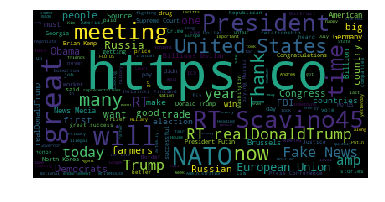

In [14]:
# Creamos el word cloud a partir de la columna Tweets
wc = WordCloud().generate(' '.join(data['Tweets']))

# Mostramos el word cloud usando Matplotlib
plt.imshow(wc)
plt.axis("off")
plt.show()

# Ejercicios a realizar

## Gráfico de sentimientos

Utilizando cualquier método de gráficos, tomen los datos de un usuario en Twitter, analicen los sentimientos de sus tweets y grafiquen los porcentajes de tweets negativos, neutros y positivos.

## Limpieza de datos

Si analizamos el word cloud que generamos en el ejemplo, nos damos cuenta que muchas palabras no son útiles para un análisis de frecuencia, ya que son partes de links, nomenclatura de Twitter (como RT) o el mismo nombre de la persona que twitteó. Vuelvan a generar el word cloud, pero realicen una limpieza del dataframe de tweets, eliminando todas las palabras que sean irrelevantes para un análisis de palabras. 

### Personalización del word cloud

También busquen en la documentación de la librería de WordCloud (https://github.com/amueller/word_cloud) y cambien el tipo de visualización, ya sea agregando una máscara, cambiando los colores, etc.